In [186]:
# ## INTRODUCTION

# This analysis evaluates two sets of data

# 1. For all data, regardless of County: various statistics are calculated for critical parameter.

# 2. For data by County: similar parameters are evaluated to observe variations and trends among Counties.


In [187]:
# 1. ESTABLISH DEPENDENCIES AND SET UP FILES

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time


import scipy.stats as st
from scipy.stats import linregress

In [188]:
# Output File (CSV)
pyre_data_path_ale = "Resources/California_Fire_Incidents.csv"

In [189]:
pyre1_df = pd.read_csv(pyre_data_path_ale)

In [190]:
# Select column headers for data frame
pyre1_df = pyre1_df[["UniqueId", "Counties", 
                         "AcresBurned", "Injuries","Fatalities", 
                         "AirTankers", "Dozers", "Engines", "Helicopters",
                         "WaterTenders","CrewsInvolved","PersonnelInvolved", 
                         "StructuresDamaged", "StructuresDestroyed", "StructuresEvacuated",
                         "StructuresThreatened"]
                       ]                
pyre1_df.head(1)

,UniqueId,Counties,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,5fb18d4d-213f-4d83-a179-daaf11939e78,Tuolumne,257314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
# Revise data frame to include fires > 10 acres only 

pyre1_df = pyre1_df.loc[pyre1_df["AcresBurned"]>10]

pyre1_df = pyre1_df.sort_values("AcresBurned", ascending = 0)

# pyre1_df = pyre1_df.drop(["CountyIds", "Days Burned", "ArchiveYear"], axis = 1)

pyre1_df = pyre1_df.reset_index(drop=True)

pyre1_df.head(1)


,UniqueId,Counties,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Mendocino,410203.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,NaN,1050.0


In [192]:
# # Create variable for the two separate evaluations.
# # First evaluation for all data, regardless of the County:

# df = pyre1_df

# df.head(1)

In [193]:
# # Second evaluation by County:

# df1 = pyre1_df.groupby(["Counties"]).sum()

# df1.head(1)

In [194]:
# 2. ANALYSIS OF ALL DATA (NOT BY COUNTY) 

In [195]:
# First evaluation for all data, regardless of the County:

df = pyre1_df

df.head(1)

,UniqueId,Counties,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,90b0daf7-5d84-42d9-bb35-bb78d4faf950,Mendocino,410203.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.0,NaN,1050.0


In [196]:
# 2.1 For all data, regardless of county: conduct statistical evaluation; add variance and remove percentiles

df
df = df.describe().round(3)
df.loc['var'] = df.apply(lambda x: x["std"]**0.5)
df = df.drop(["count", "25%","50%", "75%", "min"]).reset_index().round(2)
df.head(10)

,index,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,mean,4813.16,3.52,8.62,4.07,7.58,23.66,5.36,7.82,11.62,328.63,67.97,274.86,NaN,522.80
1,std,27905.01,3.82,18.53,6.40,14.03,41.09,7.26,12.72,14.48,523.00,155.77,1566.02,NaN,739.59
2,max,410203.00,26.00,85.00,27.00,76.00,256.00,29.00,79.00,82.00,3100.00,783.00,18804.00,NaN,2600.00
3,var,167.05,1.95,4.30,2.53,3.75,6.41,2.70,3.57,3.81,22.87,12.48,39.57,NaN,27.20


In [197]:
# Select column headers for data frame
df0 = df[["index","AcresBurned", "Injuries", "Engines", "PersonnelInvolved", 
          "StructuresDamaged", "StructuresDestroyed","StructuresThreatened"]
        ]                
df0


,index,AcresBurned,Injuries,Engines,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresThreatened
0,mean,4813.16,3.52,23.66,328.63,67.97,274.86,522.80
1,std,27905.01,3.82,41.09,523.00,155.77,1566.02,739.59
2,max,410203.00,26.00,256.00,3100.00,783.00,18804.00,2600.00
3,var,167.05,1.95,6.41,22.87,12.48,39.57,27.20


In [198]:
df01 = df0.rename(columns = {"index":"Statistics"})

df01

,Statistics,AcresBurned,Injuries,Engines,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresThreatened
0,mean,4813.16,3.52,23.66,328.63,67.97,274.86,522.80
1,std,27905.01,3.82,41.09,523.00,155.77,1566.02,739.59
2,max,410203.00,26.00,256.00,3100.00,783.00,18804.00,2600.00
3,var,167.05,1.95,6.41,22.87,12.48,39.57,27.20


In [199]:
# 2. ANALYSIS OF DATA BY COUNTY


In [200]:
# Second evaluation by County:

df1 = pyre1_df.groupby(["Counties"]).sum()

df1.head(1)

,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
Counties,,,,,,,,,,,,,,
Alameda,6387.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,18.0,0.0,1.0,0.0,0.0


In [201]:
#2.1  DETERMINE WHICH PAIRS OF FACTORS ARE CORRELATED

In [202]:
df1
df1 = df1.groupby(["Counties"]).sum()
df1.head(2)

,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
Counties,,,,,,,,,,,,,,
Alameda,6387.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,18.0,0.0,1.0,0.0,0.0
Amador,6265.0,2.0,0.0,4.0,7.0,57.0,3.0,16.0,13.0,190.0,0.0,68.0,0.0,0.0


In [203]:
# 2.1.1 Injuries vs. Acres Burned

df1 = df1.sort_values("AcresBurned", ascending = 0)
df1 = df1.reset_index()
df1.head()

,Counties,AcresBurned,Injuries,Fatalities,AirTankers,Dozers,Engines,Helicopters,WaterTenders,CrewsInvolved,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened
0,Lake,582784.0,8.0,1.0,0.0,109.0,379.0,23.0,108.0,98.0,4407.0,44.0,901.0,0.0,2075.0
1,Mendocino,512702.0,29.0,10.0,0.0,77.0,275.0,20.0,85.0,76.0,3485.0,44.0,838.0,0.0,2075.0
2,Trinity,481048.0,2.0,3.0,0.0,48.0,14.0,0.0,31.0,87.0,761.0,61.0,1657.0,0.0,0.0
3,Colusa,459316.0,3.0,1.0,0.0,82.0,273.0,23.0,84.0,63.0,3241.0,0.0,281.0,0.0,2075.0
4,Shasta,448517.0,55.0,3.0,0.0,78.0,203.0,28.0,95.0,103.0,2768.0,79.0,1940.0,0.0,0.0


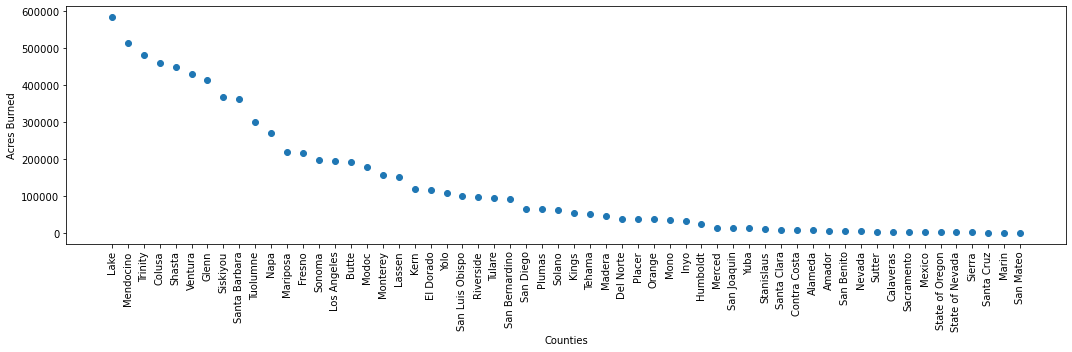

Lake County has the largest number of acres burned (582784.0)


In [204]:
#  "Acres Burned" vs "Counties" Scatter plotScatter plot

plt.scatter(df1.iloc[:,0],df1.iloc[:,1])
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Acres Burned")
plt.tight_layout()
plt.rc("figure",figsize=(15, 5))
plt.show()

p1 = df1['AcresBurned'].idxmax()
# Lake County has the highest value of acres burned = 582,784
p3 = df1["Counties"][p1]
p2 = df1['AcresBurned'].max()

print(f"{p3} County has the largest number of acres burned ({p2})")

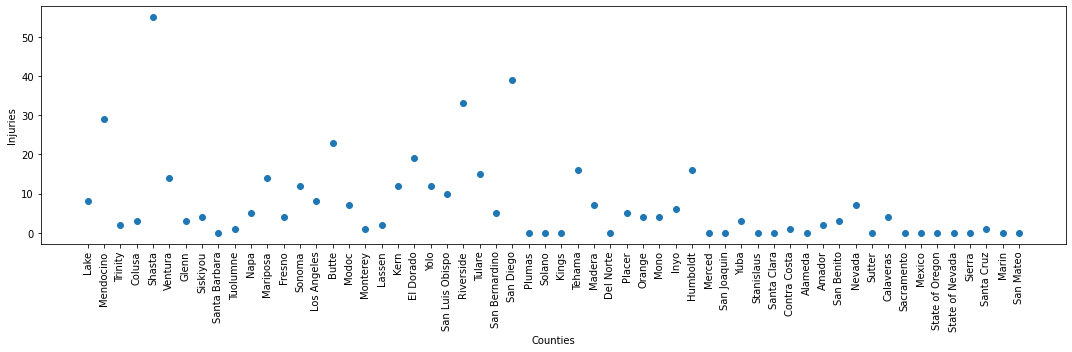

4

In [205]:
#  "Injuries" and "Counties" Scatter plotScatter plot

plt.scatter(df1.iloc[:,0],df1.iloc[:,2])
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Injuries")
plt.tight_layout()
plt.rc("figure",figsize=(15, 5))
plt.show()

df1['Injuries'].idxmax()
# Shasta County has the highest level of injuries = 55

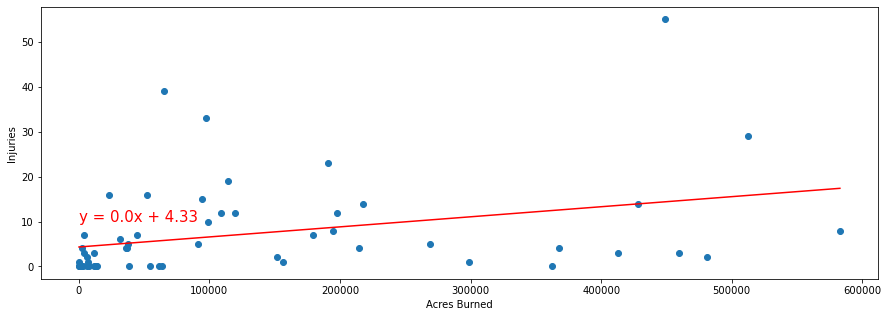

In [206]:
# "Injuries" and "Acres Burned" Scatter plot with linear regression equation and line to plot

x_values = df1['AcresBurned']
y_values = df1['Injuries']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Acres Burned')
plt.ylabel('Injuries')
plt.show()

# Alternative Method for scatter plot

# plt.scatter(df1.iloc[:,1],df1.iloc[:,2])
# plt.xticks( rotation='vertical')
# plt.xlabel("Acres Burned")
# plt.ylabel("Injuries")
# plt.tight_layout()
# plt.show()

In [207]:
# Pearson correlation coefficient between "Injuries" and "Acres Burned"

Injuries = df1.iloc[:,2]
AcresBurned = df1.iloc[:,1]
correlation = st.pearsonr(Injuries, AcresBurned)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.33


In [208]:
# 2.1.2 Injuries vs. Personnel


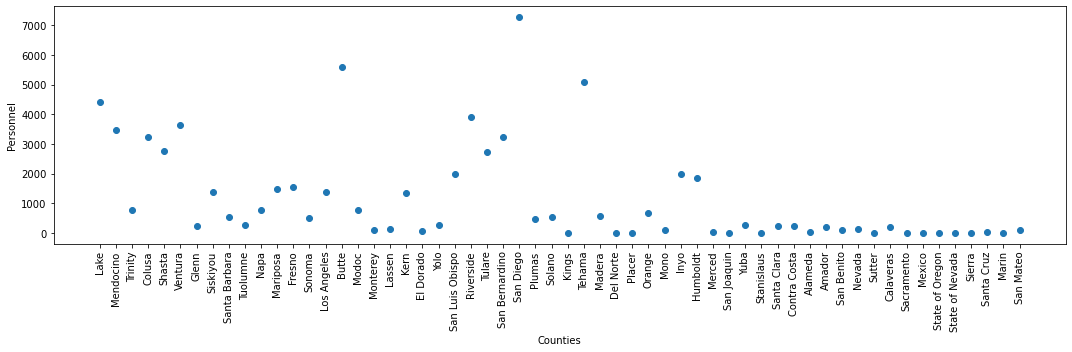

26

In [209]:
#  "Personnel" and "Counties" Scatter plotScatter plot

plt.scatter(df1.iloc[:,0],df1.iloc[:,10])
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Personnel")
plt.tight_layout()
plt.rc("figure",figsize=(15, 5))
plt.show()

df1['PersonnelInvolved'].idxmax()
# San Diego County has the highest number of personnel involved = 7278

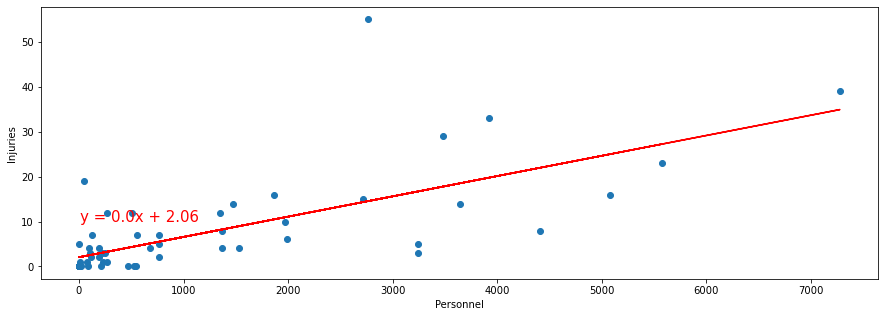

In [210]:
#  "Injuries" and "Personnel" Scatter plot with linear regression equation and line to plot

x_values = df1['PersonnelInvolved']
y_values = df1['Injuries']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Personnel')
plt.ylabel('Injuries')
plt.show()

In [211]:
# Pearson correlation coefficient between "Injuries" and "Personnel"

Injuries = df1.iloc[:,2]
Personnel = df1.iloc[:,10]
correlation = st.pearsonr(Injuries, Personnel)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.7


In [212]:
# 2.1.3 Injuries vs. Crews


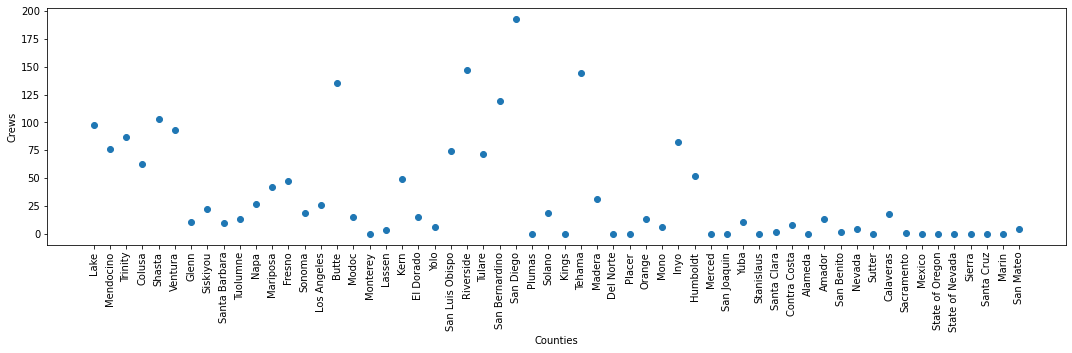

26

In [213]:
#  "Injuries" and "Counties" Scatter plotScatter plot

plt.scatter(df1.iloc[:,0],df1.iloc[:,9])
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Crews")
plt.tight_layout()
plt.rc("figure",figsize=(15, 5))
plt.show()

df1['CrewsInvolved'].idxmax()
# San Diego County has the highest number of crews involved = 193

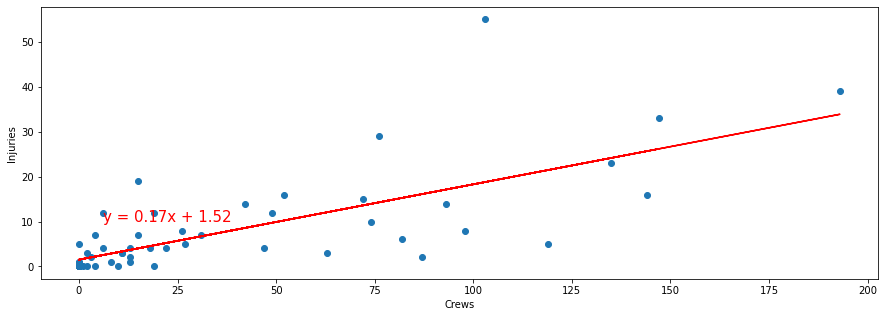

In [214]:
#  "Injuries" and "Crews" Scatter plot with linear regression equation and line to plot

x_values = df1['CrewsInvolved']
y_values = df1['Injuries']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Crews')
plt.ylabel('Injuries')
plt.show()

In [215]:
# Pearson correlation coefficient between "Injuries" and "Crews"

Injuries = df1.iloc[:,2]
Crews = df1.iloc[:,9]
correlation = st.pearsonr(Injuries, Crews)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.73


In [216]:
# 2.1.4 Structures Destroyed vs. Personnel

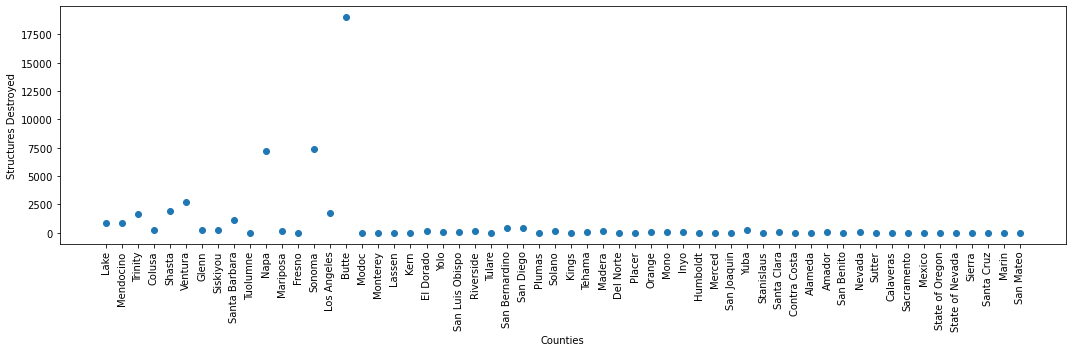

15

In [217]:
#  "Structures Destroyed" and "Counties" Scatter plotScatter plot

plt.scatter(df1.iloc[:,0],df1.iloc[:,12])
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Structures Destroyed")
plt.tight_layout()
plt.rc("figure",figsize=(15, 5))
plt.show()

df1['StructuresDestroyed'].idxmax()
# Butte County has the highest number of structures destroyed = 19021

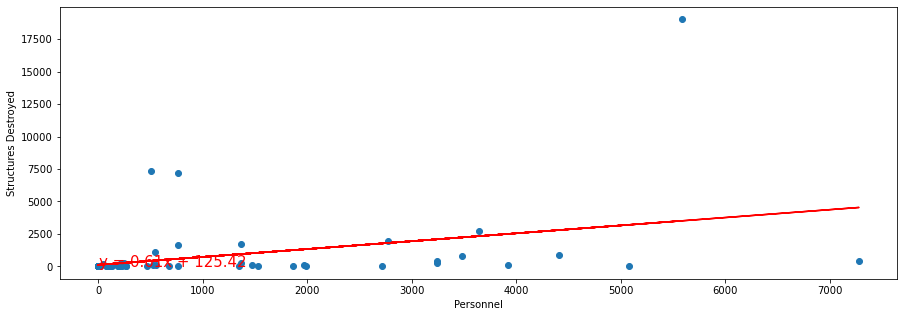

The correlation between both factors is 0.36


In [218]:
#  "Structures Destroyed" and "Personnel" Scatter plot with linear regression equation and line to plot

x_values = df1['PersonnelInvolved']
y_values = df1['StructuresDestroyed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Personnel')
plt.ylabel('Structures Destroyed')
plt.show()

# Pearson correlation coefficient between "Structures Destroyed" and "Personnel"

Personnel = df1.iloc[:,10]
StructuresDestroyed = df1.iloc[:,12]
correlation = st.pearsonr(Personnel, StructuresDestroyed)
print(f"The correlation between both factors is {round(correlation[0],2)}")

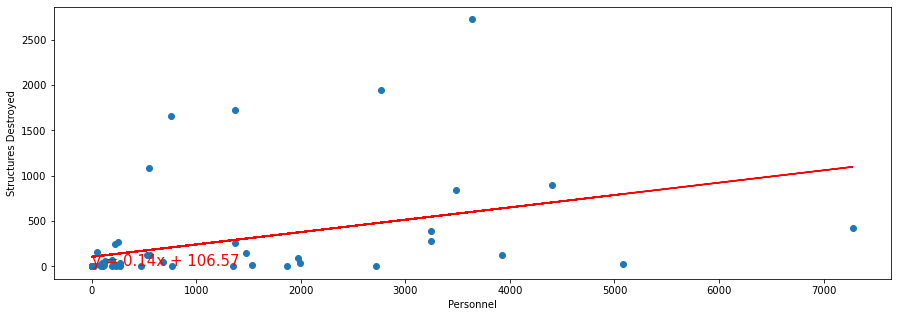

The correlation between both factors is 0.39


In [219]:
#Remove Butte Co. outlier and re-run scatter plot and linear regression

df1_1 = df1.loc[(df1["StructuresDestroyed"] <6000)]              


x_values = df1_1['PersonnelInvolved']
y_values = df1_1['StructuresDestroyed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Personnel')
plt.ylabel('Structures Destroyed')
plt.show()


# Pearson correlation coefficient between "Structures Destroyed" and "Personnel"

Personnel = df1_1.iloc[:,10]
StructuresDestroyed = df1_1.iloc[:,12]
correlation = st.pearsonr(Personnel, StructuresDestroyed)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [220]:
# 2.1.4 Structures Damaged per Personnel

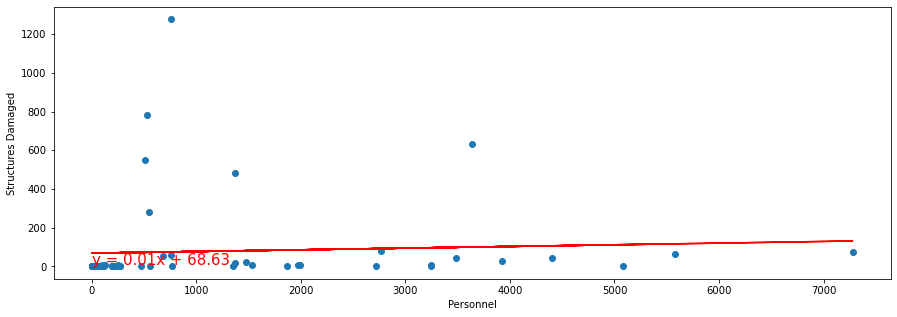

The correlation between both factors is 0.06


In [221]:
x_values = df1['PersonnelInvolved']
y_values = df1['StructuresDamaged']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Personnel')
plt.ylabel('Structures Damaged')
plt.show()


# Pearson correlation coefficient between "Structures Destroyed" and "Personnel"

Personnel = df1.iloc[:,10]
StructuresDamaged = df1.iloc[:,11]
correlation = st.pearsonr(Personnel, StructuresDamaged)
print(f"The correlation between both factors is {round(correlation[0],2)}")


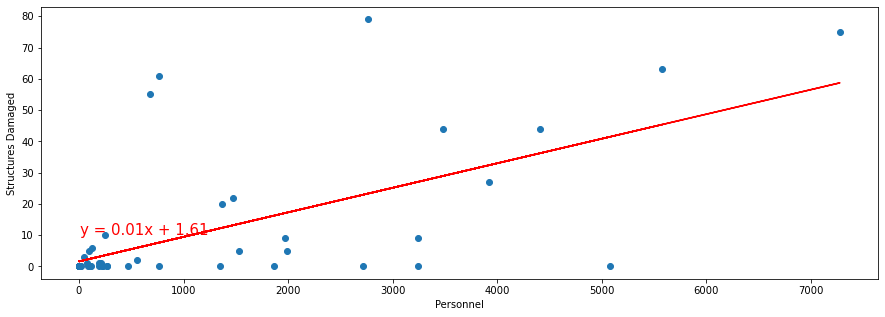

The correlation between both factors is 0.63


In [222]:
#Remove outlier > 250 and re-run scatter plot and linear regression

df1_2 = df1.loc[(df1["StructuresDamaged"] <250)]              

x_values = df1_2['PersonnelInvolved']
y_values = df1_2['StructuresDamaged']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Personnel')
plt.ylabel('Structures Damaged')
plt.show()


# Pearson correlation coefficient between "Structures Destroyed" and "Personnel"

Personnel = df1_2.iloc[:,10]
StructuresDamaged = df1_2.iloc[:,11]
correlation = st.pearsonr(Personnel, StructuresDamaged)
print(f"The correlation between both factors is {round(correlation[0],2)}")


In [223]:
# 2.1.4 Engines per Acres Burned

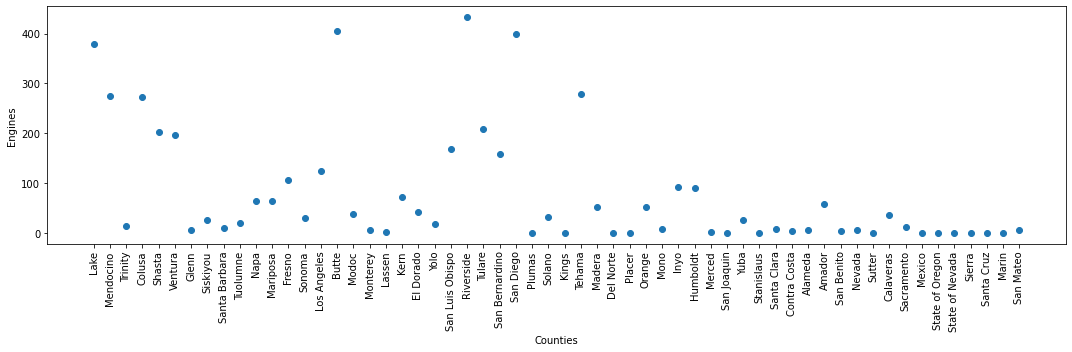

23

In [224]:
#  "Engines" and "Counties" Scatter plotScatter plot

plt.scatter(df1.iloc[:,0],df1.iloc[:,6])
plt.xticks( rotation='vertical')
plt.xlabel("Counties")
plt.ylabel("Engines")
plt.tight_layout()
plt.rc("figure",figsize=(15, 5))
plt.show()

df1['Engines'].idxmax()
# Butte County has the highest number of structures destroyed = 433

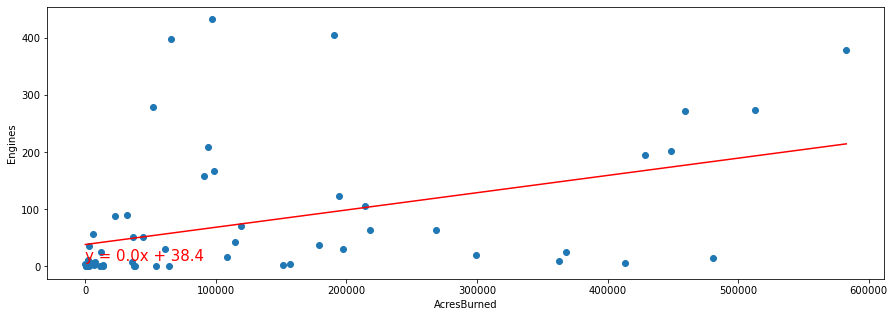

The correlation between both factors is 0.41


In [225]:
#  "Engines" vs. "Acres Burned" Scatter plot with linear regression equation and line to plot

x_values = df1['AcresBurned']
y_values = df1['Engines']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('AcresBurned')
plt.ylabel('Engines')
plt.show()

# Pearson correlation coefficient between "Structures Damaged" and "Personnel"

AcresBurned = df1.iloc[:,1]
Engines = df1.iloc[:,6]
correlation = st.pearsonr(AcresBurned, Engines)
print(f"The correlation between both factors is {round(correlation[0],2)}")

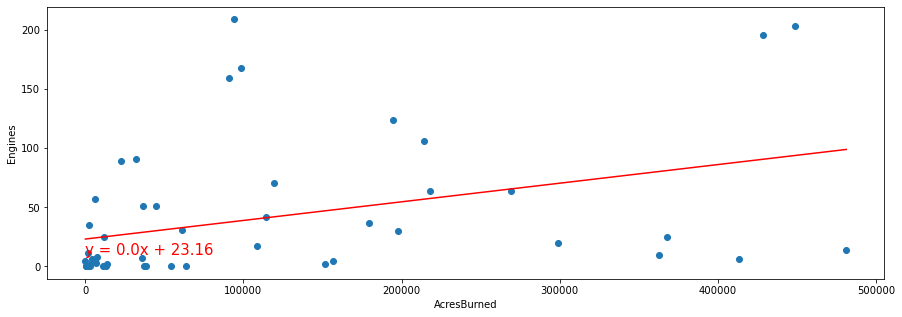

The correlation between both factors is 0.38


In [226]:
#Remove outlier > 150 and re-run scatter plot and linear regression

df1_3 = df1.loc[(df1["Engines"] <250)]              

x_values = df1_3['AcresBurned']
y_values = df1_3['Engines']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('AcresBurned')
plt.ylabel('Engines')
plt.show()

# Pearson correlation coefficient between "Structures Damaged" and "Personnel"

AcresBurned = df1_3.iloc[:,1]
Engines = df1_3.iloc[:,6]
correlation = st.pearsonr(AcresBurned, Engines)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [227]:
# SCRAP TO BE DELETED (CODE MAY TURN OUT TO BE USEFUL AT SOME POINT)--------------------------------------------------------------------------------------------------------

In [228]:
## NOT USED

# # 2.2 For all data, regardless of county: add columns showing parameters normalized 
# # by acres burned, personnel involved and crews involved.

# df

# df['100AcresBurned'] = df['AcresBurned'].div(10**2)

# df['Injuries_per_100AcresBurned'] = df['Injuries']/df['AcresBurned']*100

# df['Injuries_per_AcresBurned'] = df['Injuries']/df['AcresBurned']

# df['Injuries_per_1000Personnel'] = df['Injuries']/df['PersonnelInvolved']*1000

# df['StructuresDestroyed_per_Personnel'] = df['StructuresDestroyed']/df['PersonnelInvolved']

# df['StructuresDamaged_per_Personnel'] = df['StructuresDamaged']/df['PersonnelInvolved']

# df['Personnel_per_10Injury'] = df['PersonnelInvolved']/df['Injuries']/10

# df['Engines_per_1000AcresBurned'] = df['Engines']/df['AcresBurned']*1000

# df['Injuries_per_100Crews'] = df['Injuries']/df['CrewsInvolved']*100

# df

## NOT USED
# # Remove columns not required for evaluation, for clarity

# df = df.drop(["Fatalities","AirTankers","Dozers", "Helicopters", "WaterTenders", "StructuresEvacuated", "100AcresBurned", "Injuries_per_AcresBurned"], axis =1)

# df.round(2)

## NOT USED


# # Remove additional columns, for clarity

# df_r = df.drop(["AcresBurned", "Injuries", "Engines","CrewsInvolved", "PersonnelInvolved",
#              "StructuresDamaged", "StructuresDestroyed", "StructuresThreatened",
#              "StructuresDestroyed_per_Personnel", "StructuresDamaged_per_Personnel",
#                "Engines_per_1000AcresBurned"], axis =1)
# df_r = df_r.set_index("index")

# df_r.round(2)

## NOT USED

# df_r.plot(kind="bar", stacked=False, rot=90, alpha=0.75)
# plt.title("Injuries vs Personnel Evaluation for All Data")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xlabel("Index")
# plt.show()

## NOT USED

# # Remove additional columns, for clarity

# df_r1 = df.drop(["AcresBurned", "Injuries", "Engines","CrewsInvolved", "PersonnelInvolved",
#              "StructuresDamaged", "StructuresDestroyed", "Injuries_per_100AcresBurned",
#              "Injuries_per_1000Personnel", "Personnel_per_10Injury",
#                "Injuries_per_100Crews", "StructuresThreatened"], axis =1)
# df_r1 = df_r1.set_index("index")

# df_r1.round(2)

## NOT USED

# df_r1.plot(kind="bar", stacked=False, rot=90, alpha=0.75)
# plt.title("Daa Evaluation for All Data")
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xlabel("Index")
# plt.show()

In [229]:
# LINE PLOT WITH Counties on X AXIS

# counties_list = df2["Counties"].to_list()
# print(counties_list)


# df2_copy = df2
# df3 = df2_copy.set_index("Counties")
# df3.head()


# df2.plot(kind = "line", figsize=(10,5))
# plt.xticks(np.arange(len(counties_list)), counties_list, rotation=45)
# plt.tight_layout()
# plt.show()

In [230]:
 # Remove columns, for clarity
# df2 = df2.drop([
#               "AcresBurned", "100AcresBurned",
#                 "Injuries", "Engines","CrewsInvolved", "PersonnelInvolved",
#               "StructuresDamaged", "StructuresDestroyed", 
#                 "Injuries_per_AcresBurned", "Injuries_per_100Personnel", "Personnel_per_10Injury",
#                 "Injuries_per_100Crews", "StructuresThreatened",
#                 ], axis =1)
# # df2 = df2.set_index("Counties")
# df2.head(1).round(2)

In [231]:
# # 2.2 For analysis by County: add columns showing parameters normalized by acres burned, personnel involved and crews involved.
# #Remove columns not required

# df2 = df1.groupby(["Counties"]).sum()

# df2['100AcresBurned'] = df1['AcresBurned'].div(100)

# df2['Injuries_per_100AcresBurned'] = df1['Injuries']/df1['AcresBurned']*100

# df2['Injuries_per_AcresBurned'] = df1['Injuries']/df1['AcresBurned']

# df2['Injuries_per_100Personnel'] = df1['Injuries']/df1['PersonnelInvolved']*100

# df2['StructuresDestroyed_per_PersonnelInvolved'] = df1['StructuresDestroyed']/df1['PersonnelInvolved']

# df2['StructuresDamaged_per_PersonnelInvolved'] = df1['StructuresDamaged']/df1['PersonnelInvolved']

# df2['Personnel_per_10Injury'] = df1['PersonnelInvolved']/df1['Injuries']/10

# df2['Engines_per_1000AcresBurned'] = df1['Engines']/df1['AcresBurned']*1000

# df2['Injuries_per_100Crews'] = df1['Injuries']/df1['CrewsInvolved']*100

# df2 = df2.sort_values("AcresBurned", ascending = 0).reset_index(drop = False)

# df2 = df2.drop(["Fatalities","AirTankers","Dozers", "Helicopters", "WaterTenders", "StructuresEvacuated", "Engines_per_1000AcresBurned"], axis =1)


# df2.head()


In [232]:
# df5 = df5.sort_values([("AcresBurned", "mean")], ascending = False).round(2)

# df1 = df[["UniqueId", "Counties", "AcresBurned", 
#           "Injuries","StructuresDestroyed", "Injuries_per_AcresBurned",
# #          "Injuries_per_100AcresBurned" ]
#         ]
# df2 = pd.concat([df1,PersonnelInvolved], axis = 1)

# df3 = df3.drop(axis=1,columns=["25%","50%", "75%"], level = 1)
# DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

# df1 = df1.loc[
#                 (df1["Injuries_per_MilAcresBurned"] >0) 
#                & (df1["MilAcresBurned"] > 0.001)
#                 & (df1["Personnel_per_MilAcresBurned"] > 0)
#                 & (df1["Personnel_per_Injury"] > 0)
#              ]


# stats_tot_mean = df.groupby(["Counties"]).mean()
# # stats_tot_mean = stats_tot_mean.sort_values("AcresBurned", ascending = 0).reset_index().round(0)

# # Generate a summary statistics table of mean, median, variance, standard deviation, 
# # and SEM of the tumor volume for each regimen
# ac_burn_mean = major.groupby('Counties')['AcresBurned'].mean()
# ac_burn_median = major.groupby('Counties')['AcresBurned'].median()
# ac_burn_variance = major.groupby('Counties')['AcresBurned'].var()
# ac_burn_standard_dv = major.groupby('Counties')['AcresBurned'].std()
# ac_burn_sem = major.groupby('Counties')['AcresBurned'].sem()

# ac_burn_summary_stat = pd.DataFrame({"Acres Burned Mean": ac_burn_mean, 
#                                       "Acres Burned Median": ac_burn_median, 
#                                       "Acres Burned Variance": ac_burn_variance, 
#                                       "Acres Burned Standard Deviation": ac_burn_standard_dv,
#                                       "Acres Burned SEM": ac_burn_sem}
#                                       )

# clean = fires_by_county[(fires_by_county['ArchiveYear'] >= 2020) & (fires_by_county['ArchiveYear'] <= 2010)].index

# fires_by_county.drop(clean, inplace=True)
# fires_by_county.head()


# pyre1_df = pyre1_df.loc[pyre1_df["MajorIncident"]==True]
# pyre1_df.head(1)
# pyre1_df["MajorIncident"].count()